In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
import os

ign_dir = os.path.join('/content/drive/My Drive/Colab Notebooks/datasets (2).zip (Unzipped Files)/datasets/testset/igneous')
meta_dir = os.path.join('/content/drive/My Drive/Colab Notebooks/datasets (2).zip (Unzipped Files)/datasets/testset/metamorphic')
sedi_dir = os.path.join('/content/drive/My Drive/Colab Notebooks/datasets (2).zip (Unzipped Files)/datasets/testset/sedimentary')

print('total training rock images:', len(os.listdir(ign_dir)))
print('total training paper images:', len(os.listdir(meta_dir)))
print('total training scissors images:', len(os.listdir(sedi_dir)))

total training rock images: 61
total training paper images: 61
total training scissors images: 50


In [ ]:
import tensorflow as tf

In [ ]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = "/content/drive/My Drive/Colab Notebooks/datasets (2).zip (Unzipped Files)/datasets/testset"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/drive/My Drive/Colab Notebooks/datasets (2).zip (Unzipped Files)/datasets/trainset"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(64,64),
	class_mode='categorical',
  batch_size=15
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(64,64),
	class_mode='categorical',
  batch_size=15
)


Found 172 images belonging to 3 classes.
Found 405 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64,64, 3)),
    tf.keras.layers.MaxPooling2D(3, 3),
    # The second convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(3,3),
    
    tf.keras.layers.Flatten(),

    
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(
      train_generator,
      steps_per_epoch=int( 405/15 ),  
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=int(172/15))




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         147584    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

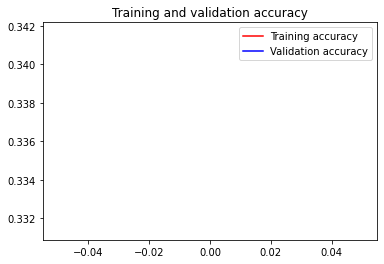

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(64,64))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)
  print(type(classes))
  
  

Using TensorFlow backend.
